<a href="https://colab.research.google.com/github/pipit20/Breast-Cancer-Wisconsin/blob/main/Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [ ]:
pd.set_option('display.max_columns', None)

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dsnalzami/dataset_resources/main/breast-cancer-wisconsin.data', header=None)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# buka kode dibawah jika diperlukan
dataset.columns=["Sample_code_number","Clump_thickness","Uniformity_of_cell_size","Uniformity_of_cell_shape","Marginal_adhesion","Single_epithelial_cell_size","Bare_nuclei","Bland_chromatin","Normal_nucleoli","Mitoses","Class"]

In [ ]:
dataset.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## BAB 2 – (J.62DMI00.005.1) Menelaah data



### analisis karakteristik data
menggunakan info

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### cek deskripsi data
menggunakan describe

In [ ]:
dataset.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
dataset = dataset.set_index('Sample_code_number')

In [ ]:
dataset.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Sample_code_number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_of_cell_size      699 non-null    int64 
 2   Uniformity_of_cell_shape     699 non-null    int64 
 3   Marginal_adhesion            699 non-null    int64 
 4   Single_epithelial_cell_size  699 non-null    int64 
 5   Bare_nuclei                  699 non-null    object
 6   Bland_chromatin              699 non-null    int64 
 7   Normal_nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


### cek distribusi Class
pastikan anda sudah mengetahui class yang dicari

In [ ]:
dataset['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

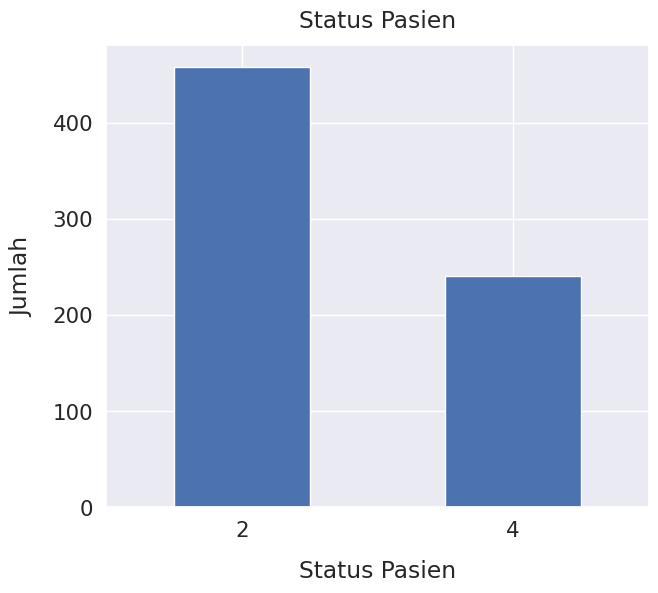

In [ ]:
sns.set(font_scale=1.4)
dataset['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Pasien", y=1.02);

## Cek Distribusi fitur
silakan perbanyak kode dibawah ini sesuai fitur

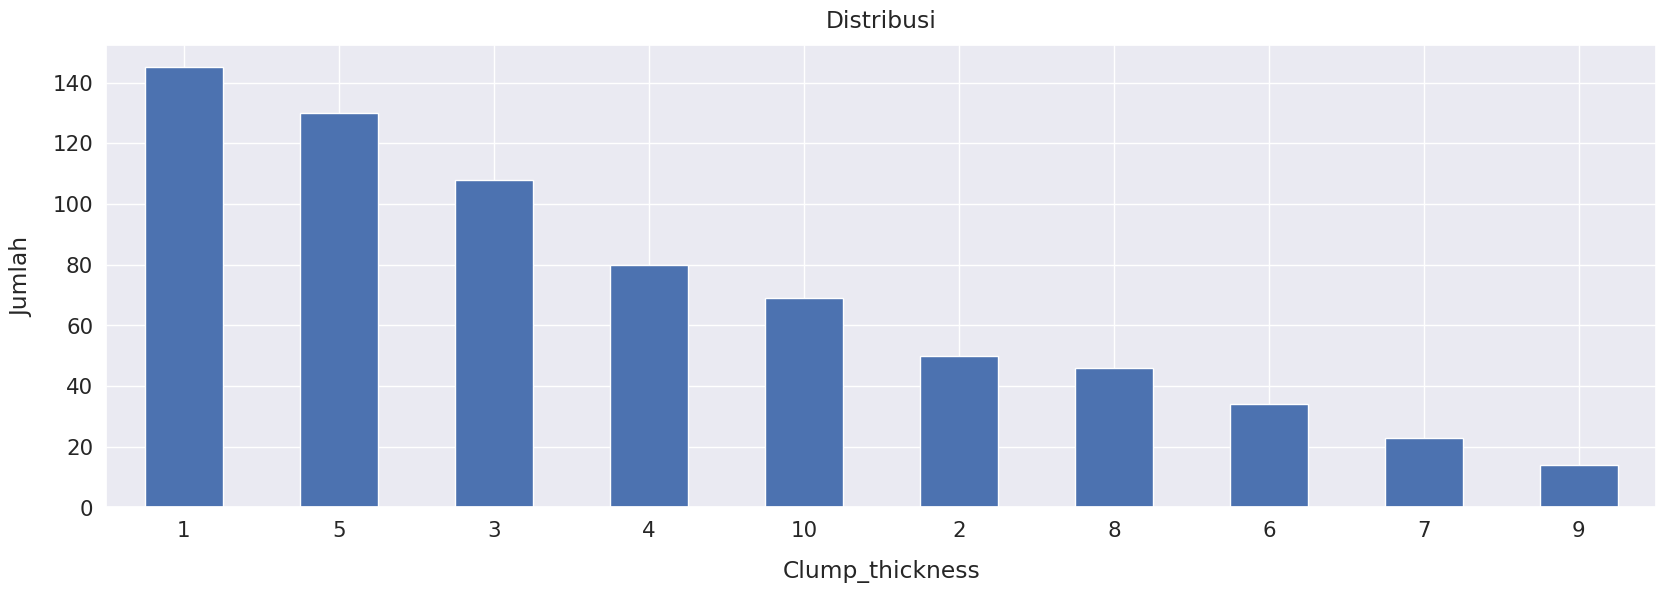

In [ ]:
sns.set(font_scale=1.4)
dataset['Clump_thickness'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Clump_thickness", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

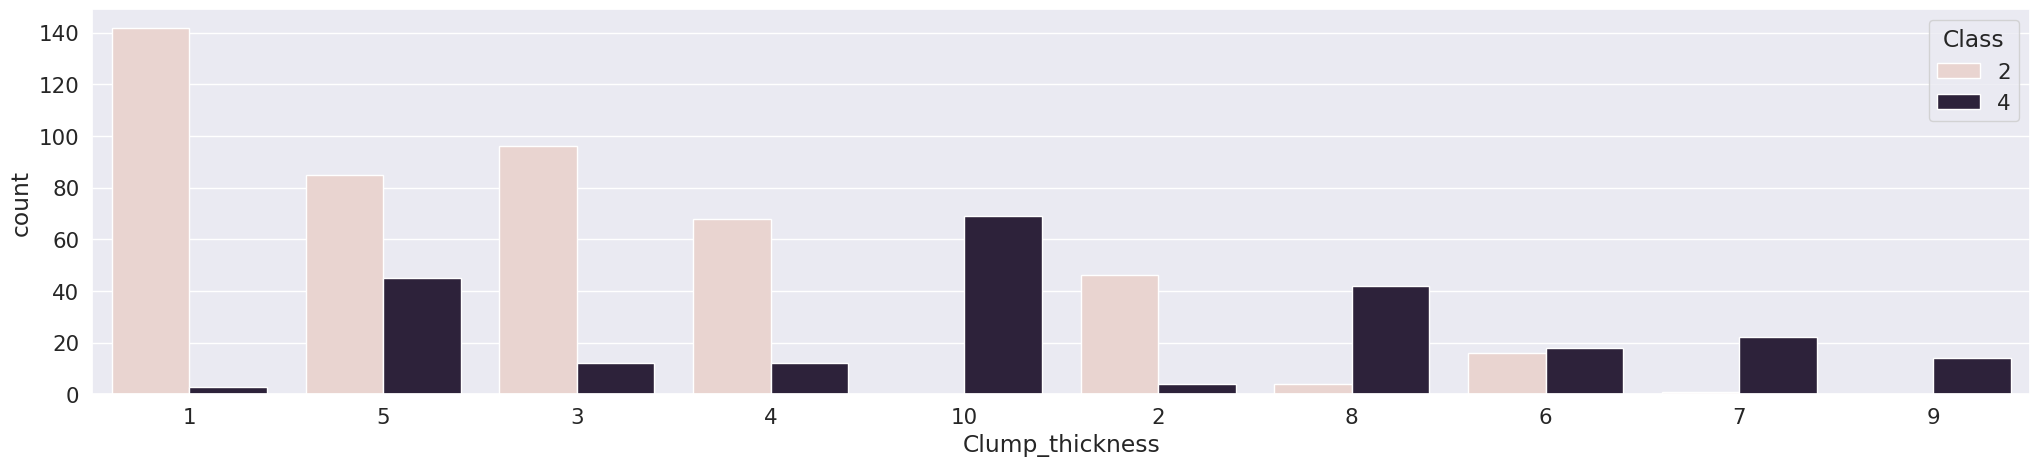

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Clump_thickness'],order=dataset['Clump_thickness'].value_counts().index,hue=dataset['Class'])
plt.show()

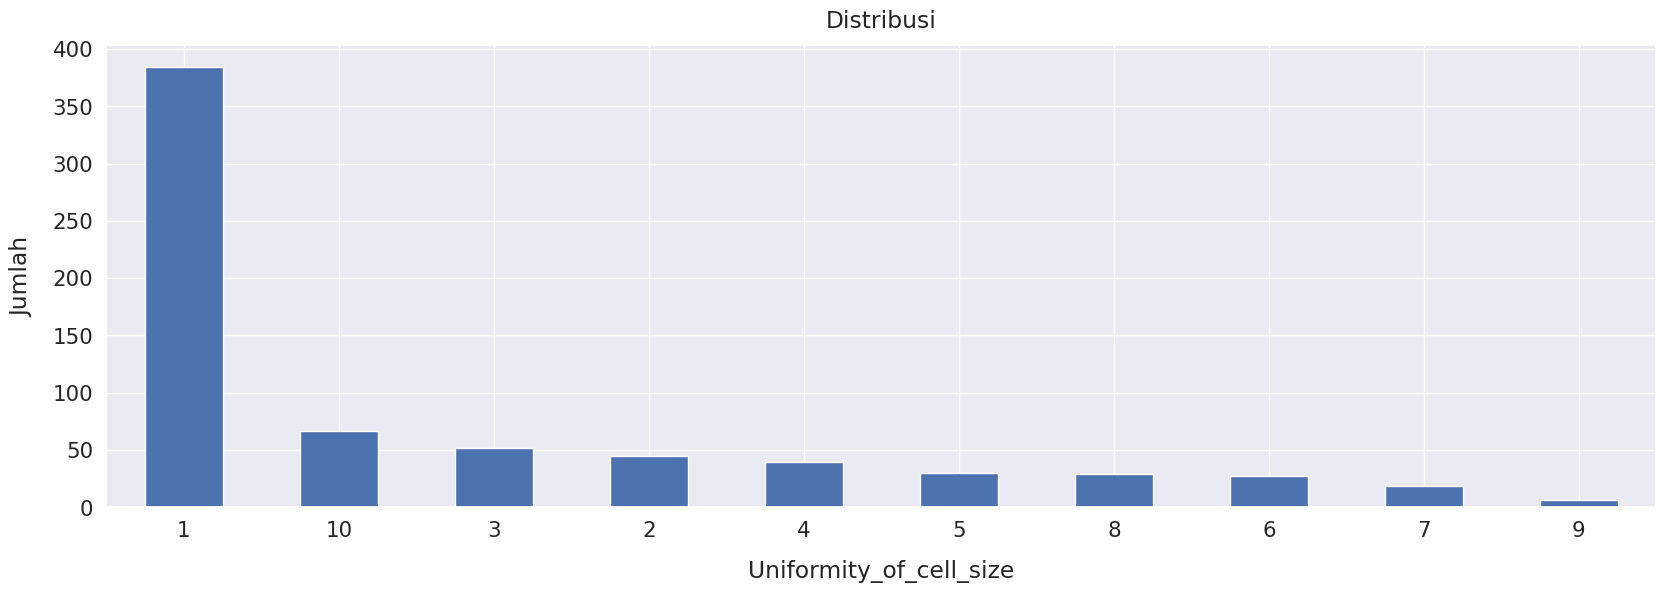

In [ ]:
sns.set(font_scale=1.4)
dataset['Uniformity_of_cell_size'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Uniformity_of_cell_size", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

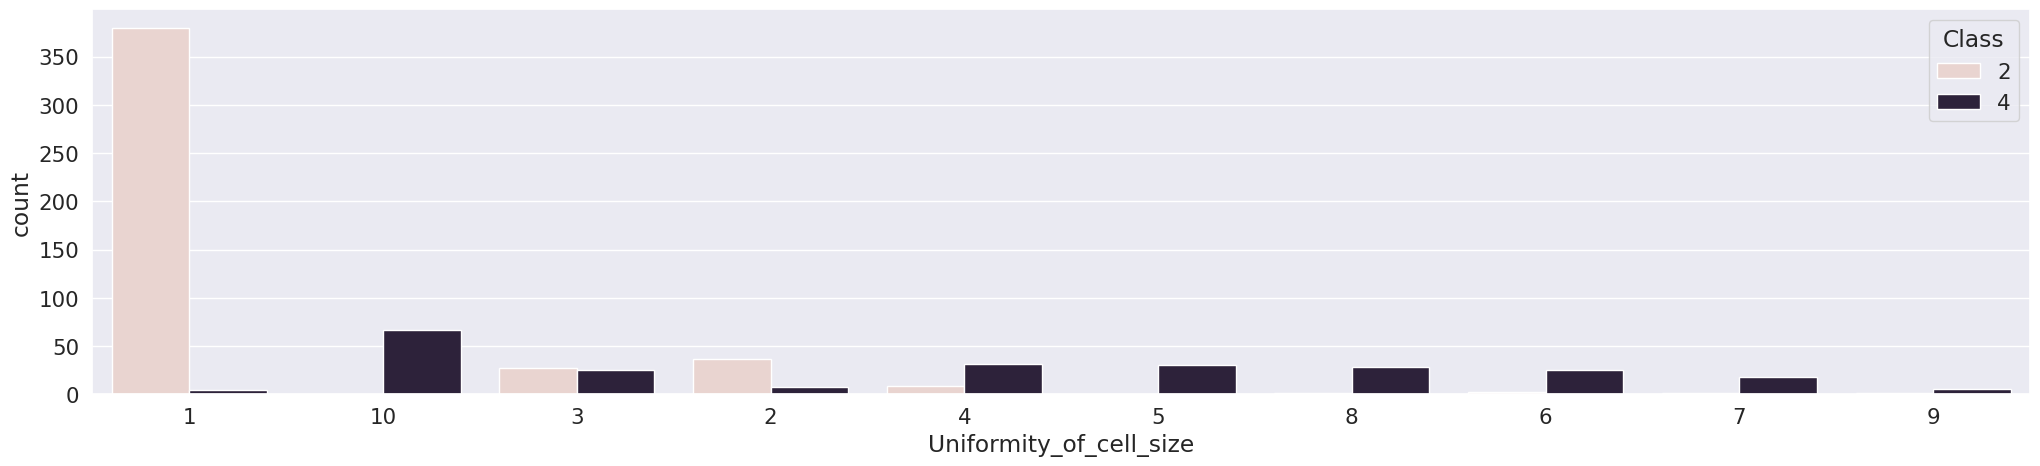

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Uniformity_of_cell_size'],order=dataset['Uniformity_of_cell_size'].value_counts().index,hue=dataset['Class'])
plt.show()

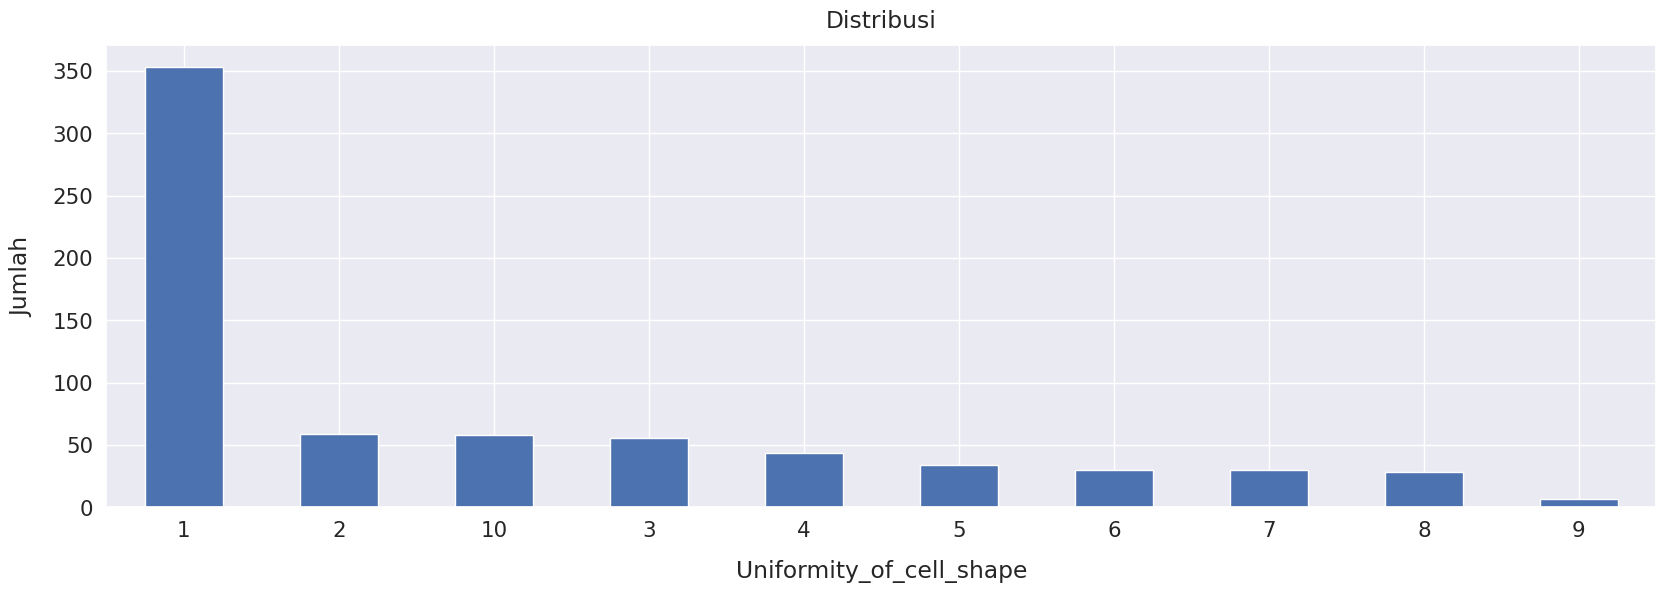

In [ ]:
sns.set(font_scale=1.4)
dataset['Uniformity_of_cell_shape'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Uniformity_of_cell_shape", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

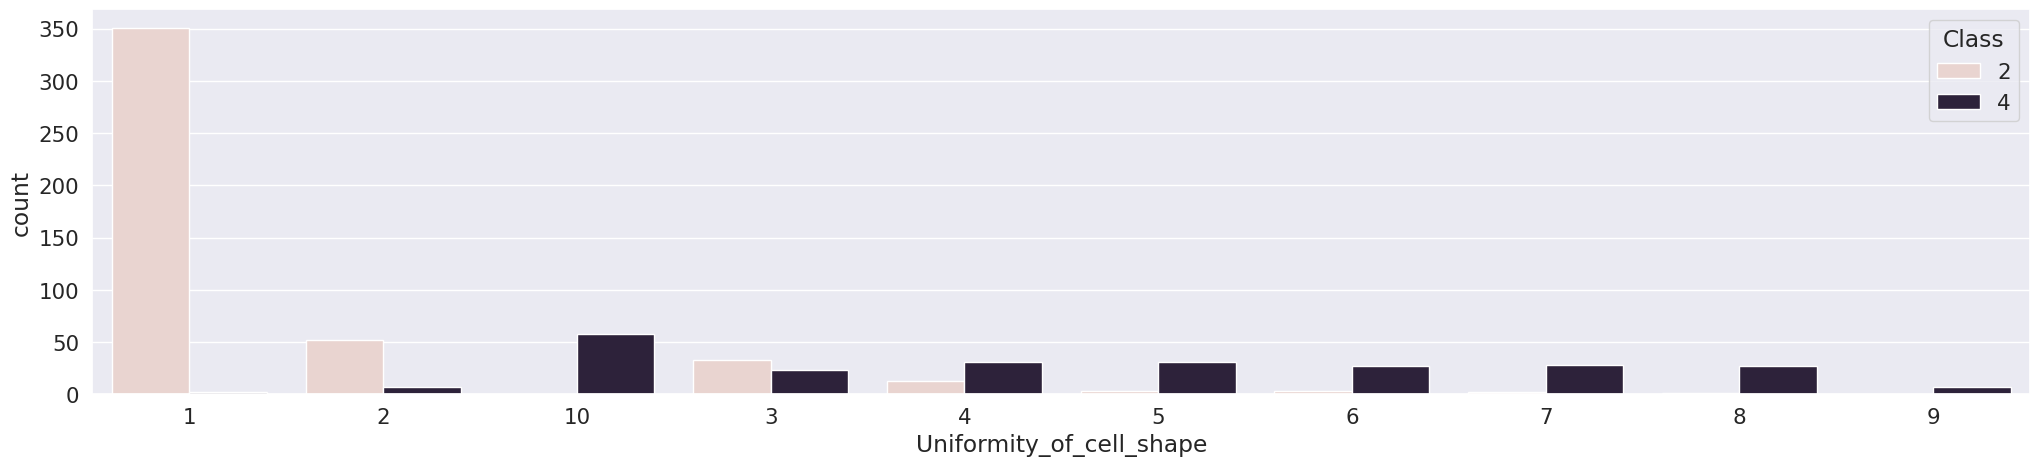

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Uniformity_of_cell_shape'],order=dataset['Uniformity_of_cell_shape'].value_counts().index,hue=dataset['Class'])
plt.show()

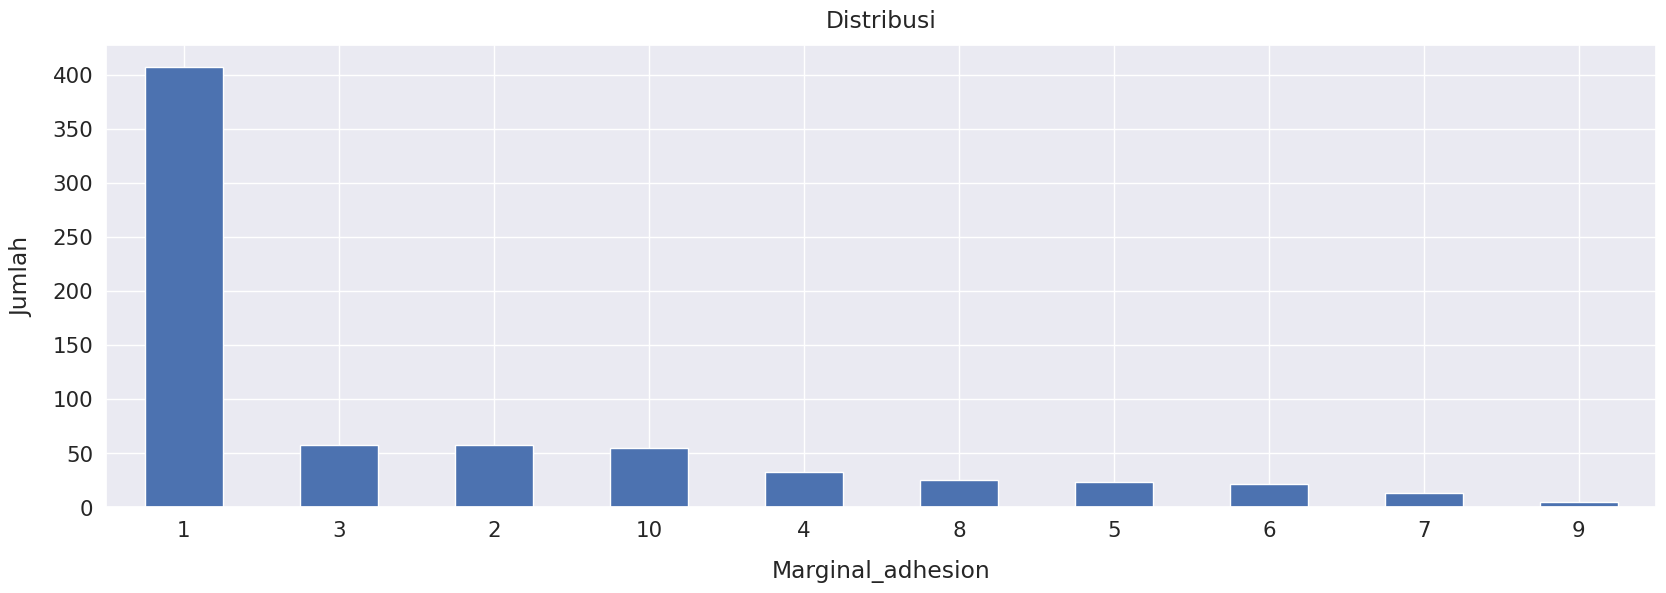

In [ ]:
sns.set(font_scale=1.4)
dataset['Marginal_adhesion'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Marginal_adhesion", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

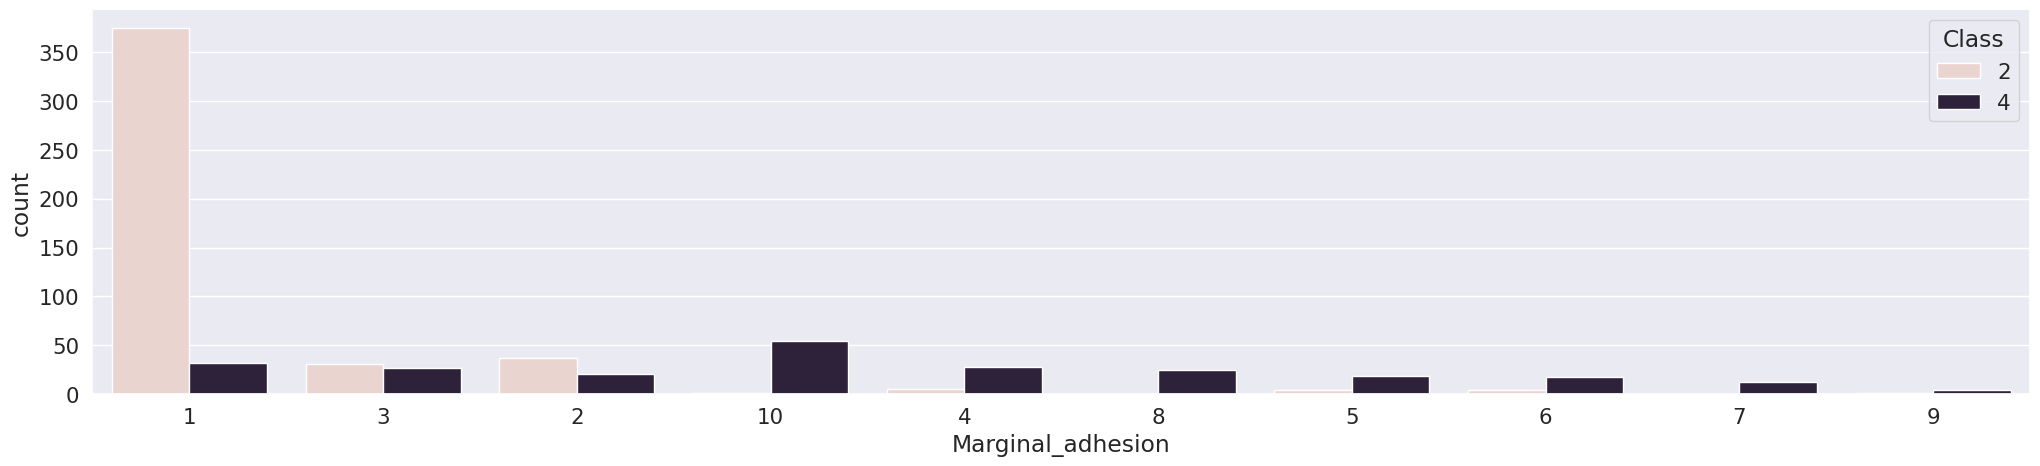

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Marginal_adhesion'],order=dataset['Marginal_adhesion'].value_counts().index,hue=dataset['Class'])
plt.show()

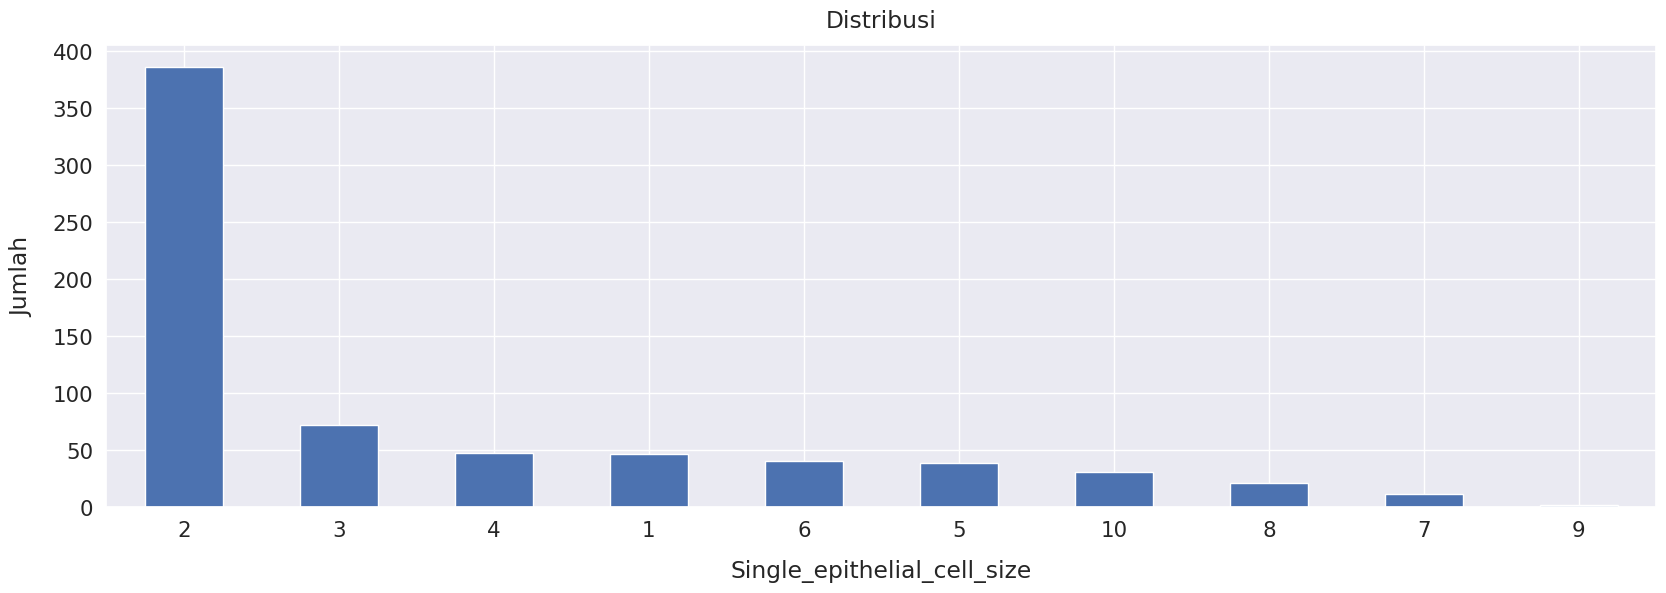

In [ ]:
sns.set(font_scale=1.4)
dataset['Single_epithelial_cell_size'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Single_epithelial_cell_size", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

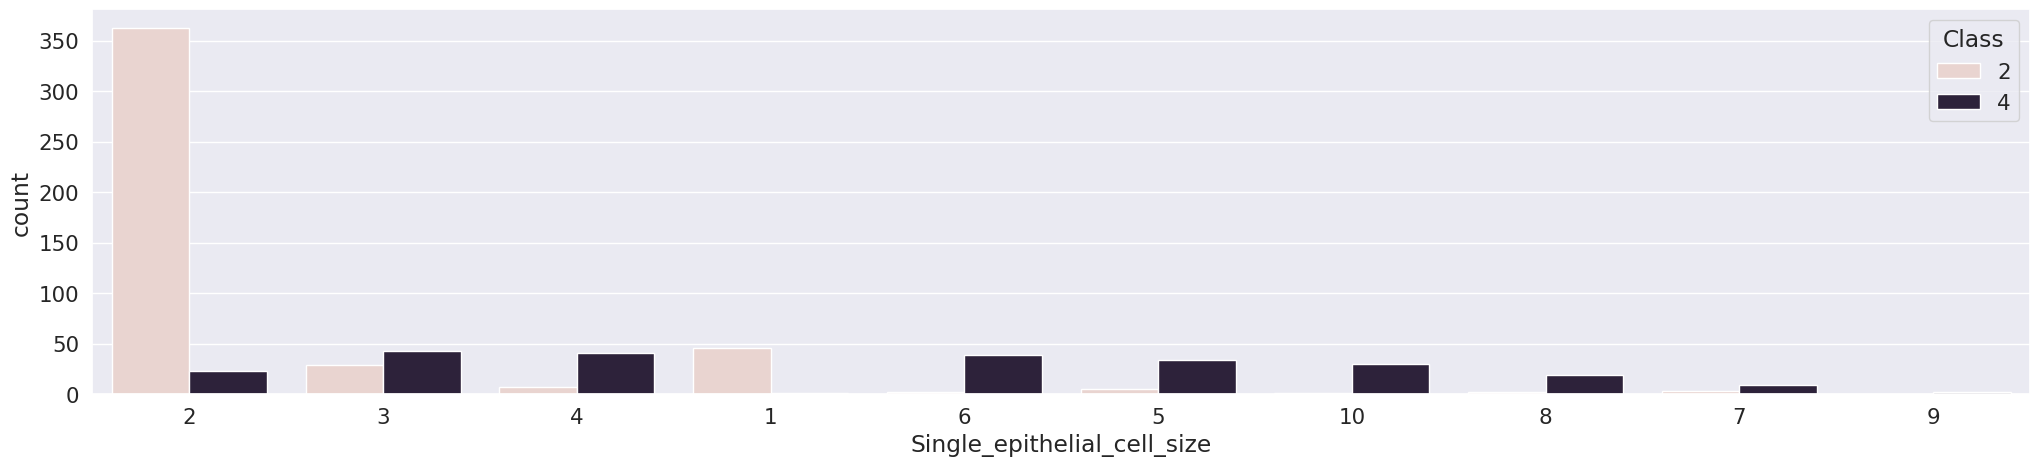

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Single_epithelial_cell_size'],order=dataset['Single_epithelial_cell_size'].value_counts().index,hue=dataset['Class'])
plt.show()

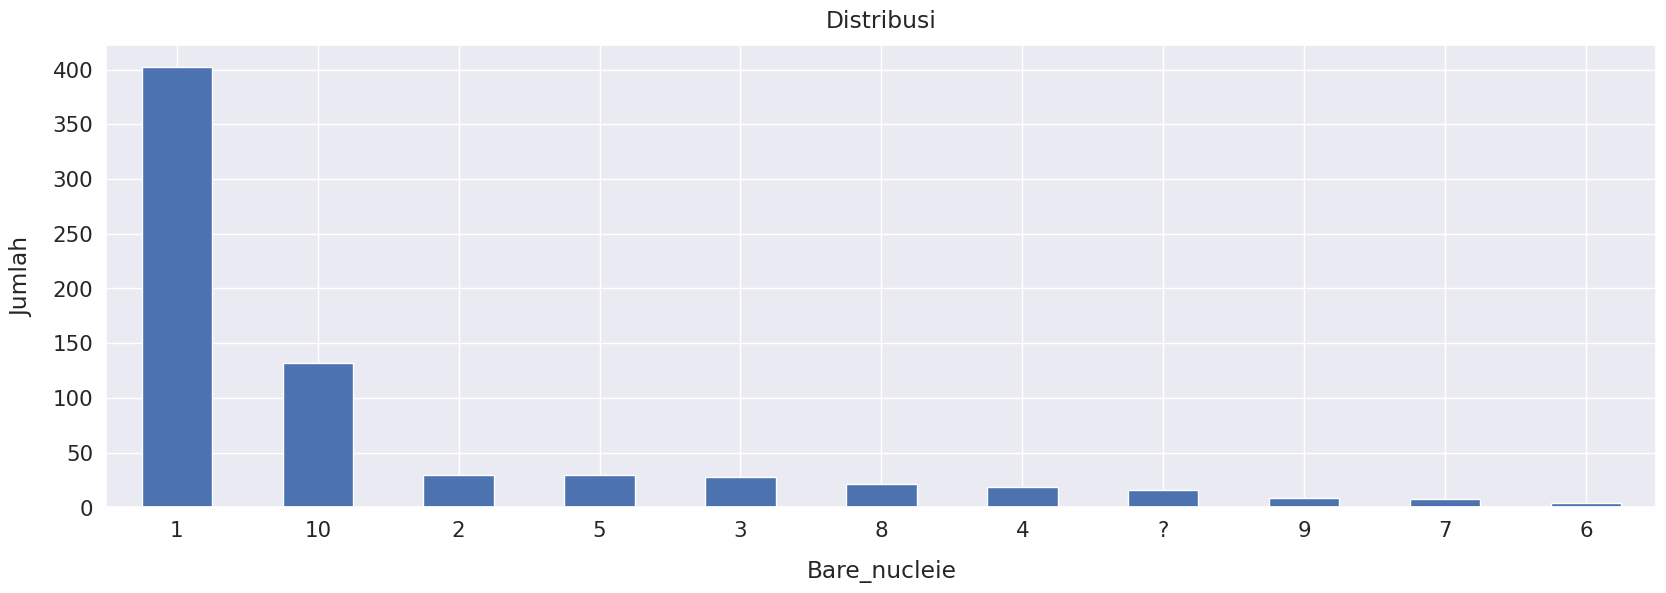

In [ ]:
sns.set(font_scale=1.4)
dataset['Bare_nuclei'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Bare_nucleie", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

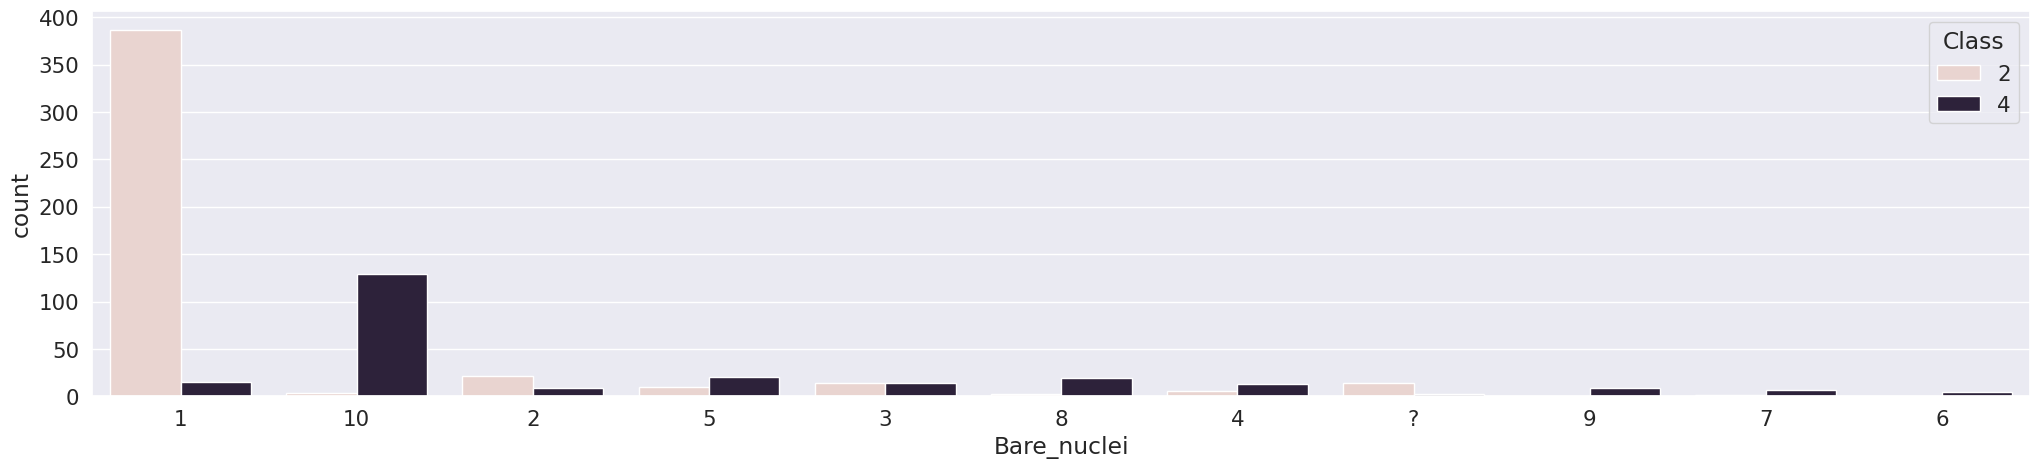

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Bare_nuclei'],order=dataset['Bare_nuclei'].value_counts().index,hue=dataset['Class'])
plt.show()

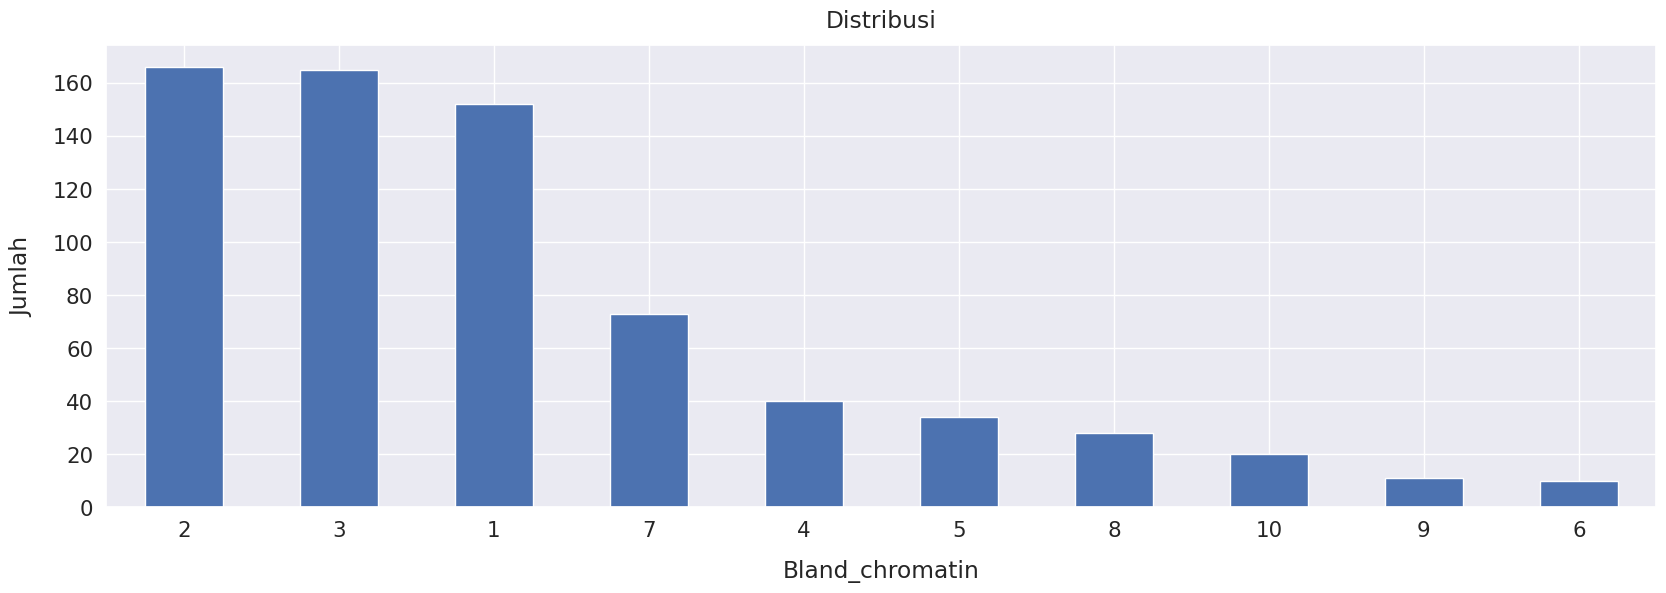

In [ ]:
sns.set(font_scale=1.4)
dataset['Bland_chromatin'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Bland_chromatin", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

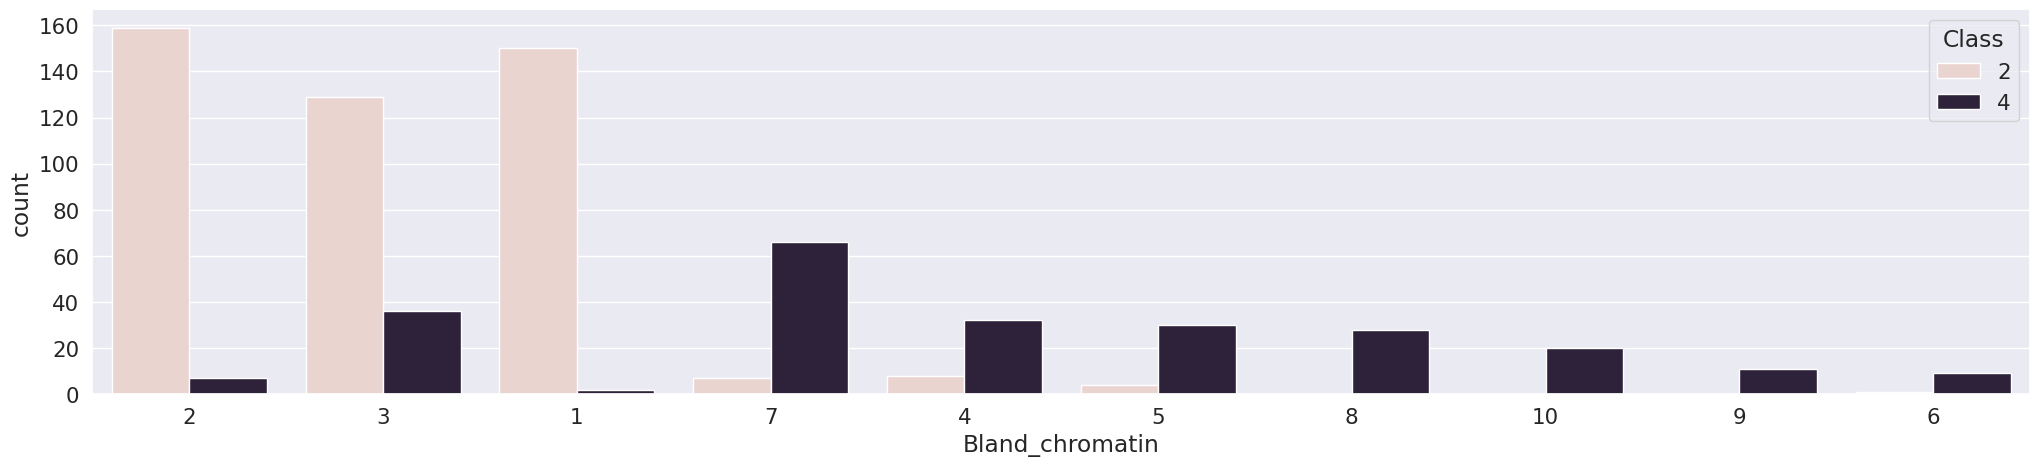

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Bland_chromatin'],order=dataset['Bland_chromatin'].value_counts().index,hue=dataset['Class'])
plt.show()

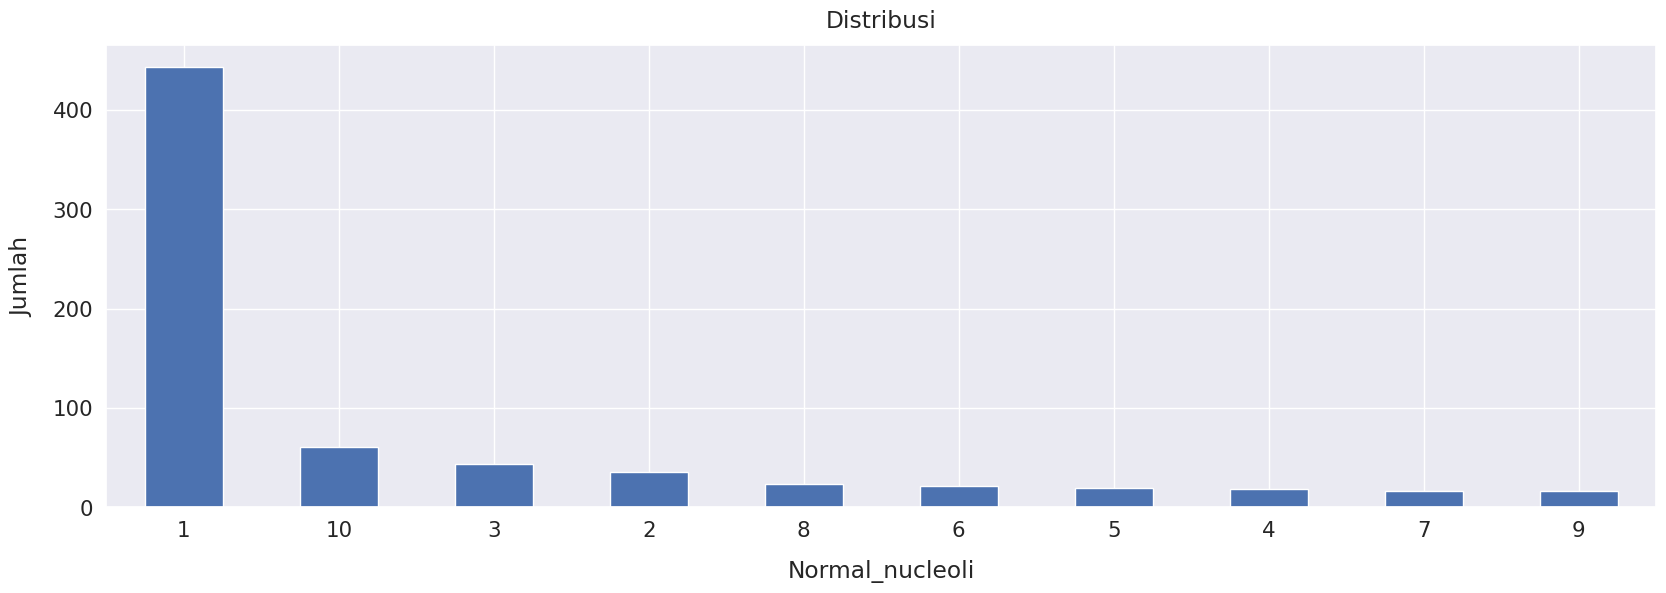

In [ ]:
sns.set(font_scale=1.4)
dataset['Normal_nucleoli'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Normal_nucleoli", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

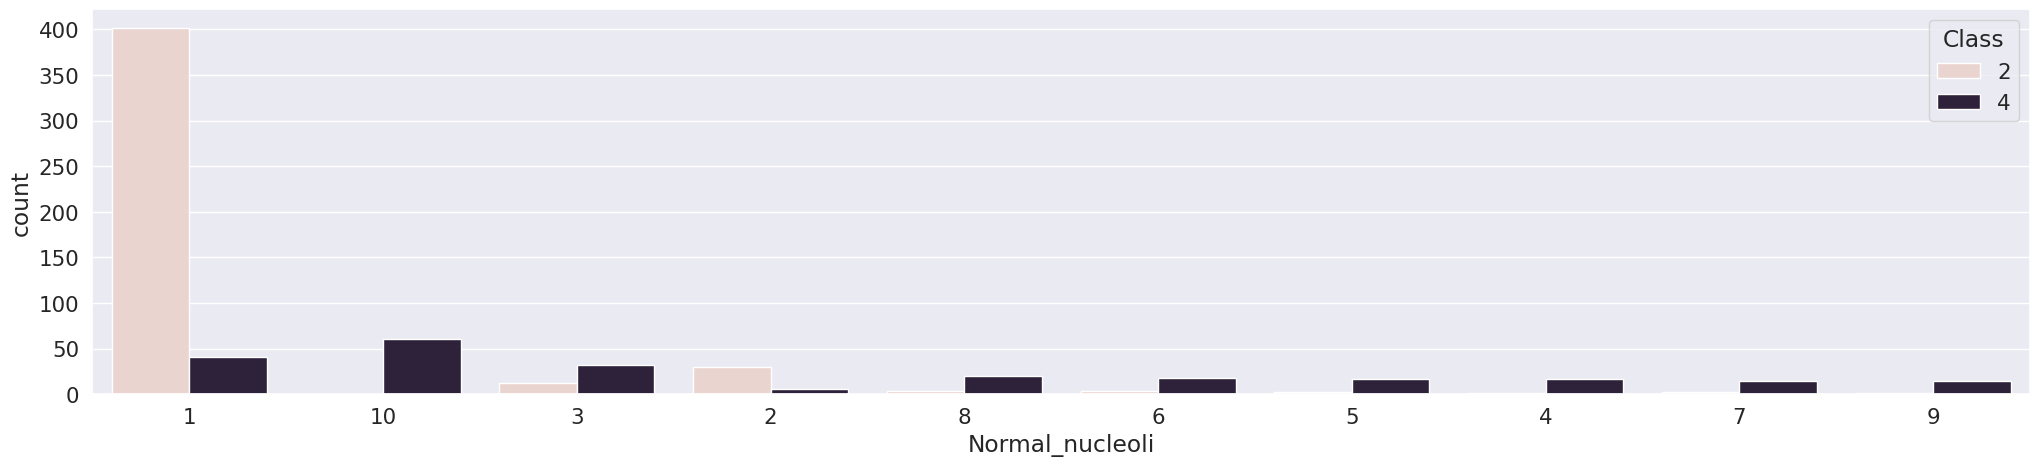

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Normal_nucleoli'],order=dataset['Normal_nucleoli'].value_counts().index,hue=dataset['Class'])
plt.show()

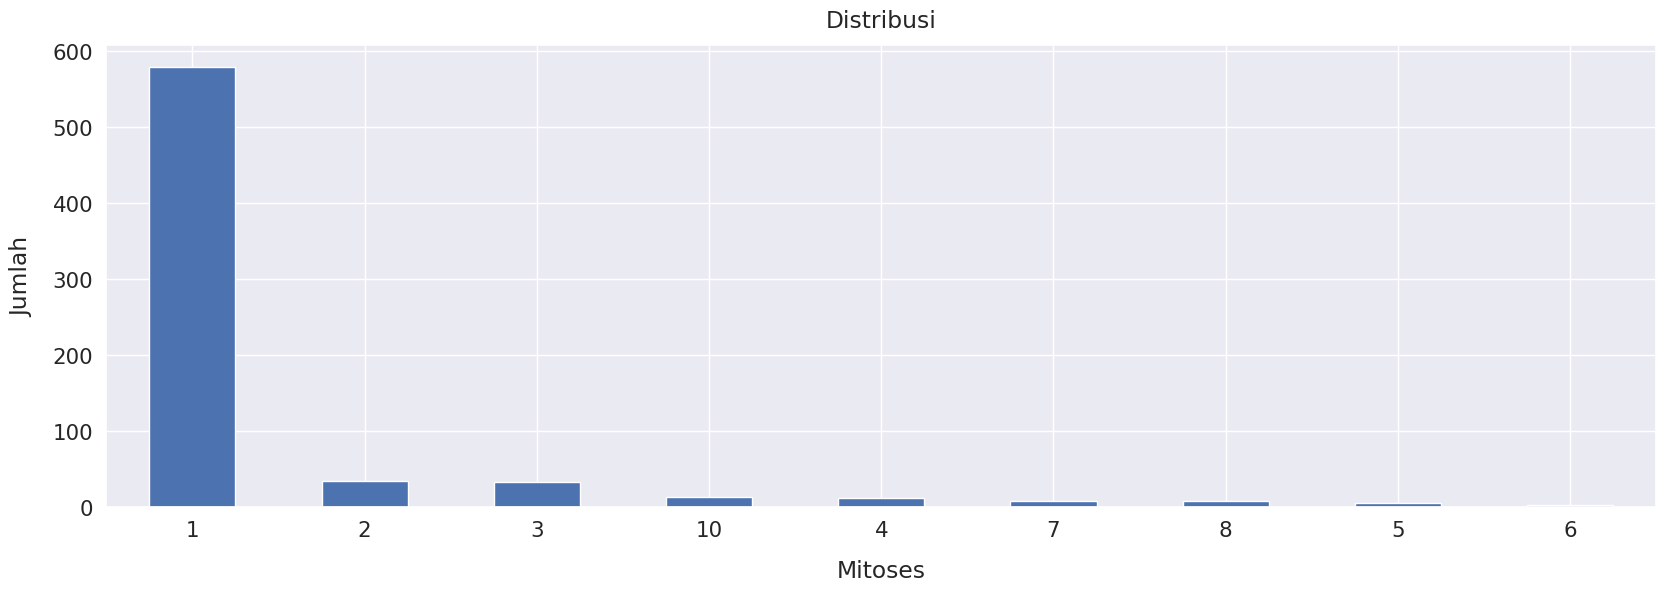

In [ ]:
sns.set(font_scale=1.4)
dataset['Mitoses'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Mitoses", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi", y=1.02);

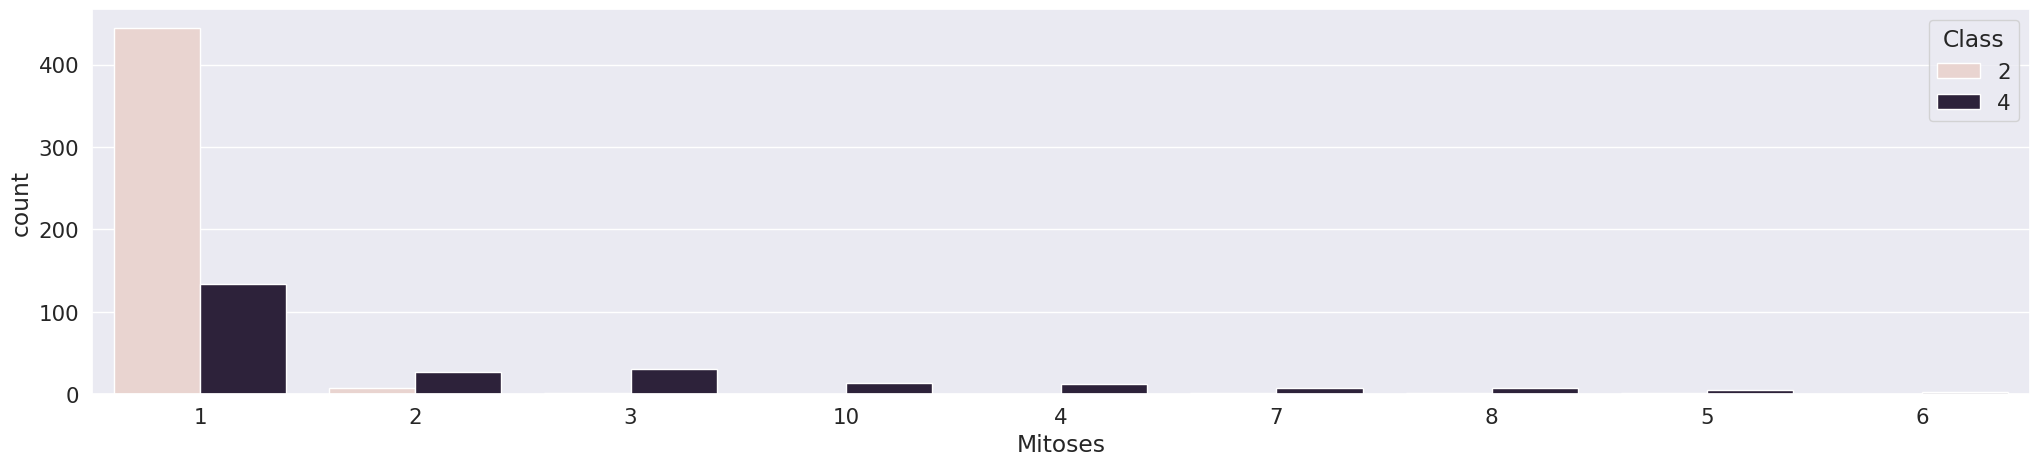

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Mitoses'],order=dataset['Mitoses'].value_counts().index,hue=dataset['Class'])
plt.show()

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

**temuan**:
- Penilaian kualitas data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- Penilaian tingkat kecukupan data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- ada beberapa fitur yang nilainya hilang, harus digunakan tahapan **`memperbaiki nilai yang hilang`**


## BAB 4 – (J.62DMI00.007.1) menentukan object data
silakan generate table menggunakan https://www.tablesgenerator.com/markdown_tables

## BAB 5 – (J.62DMI00.008.1) membersihkan data

### Memperbaiki nilai yang hilang

catatan: nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

In [ ]:
dataset.replace("?", np.nan, inplace= True)

### tahap memperbaiki nilai yang hilang


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['Bare_nuclei'], dtype='object')

In [ ]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

Bare_nuclei    2.288984
dtype: float64

<Axes: >

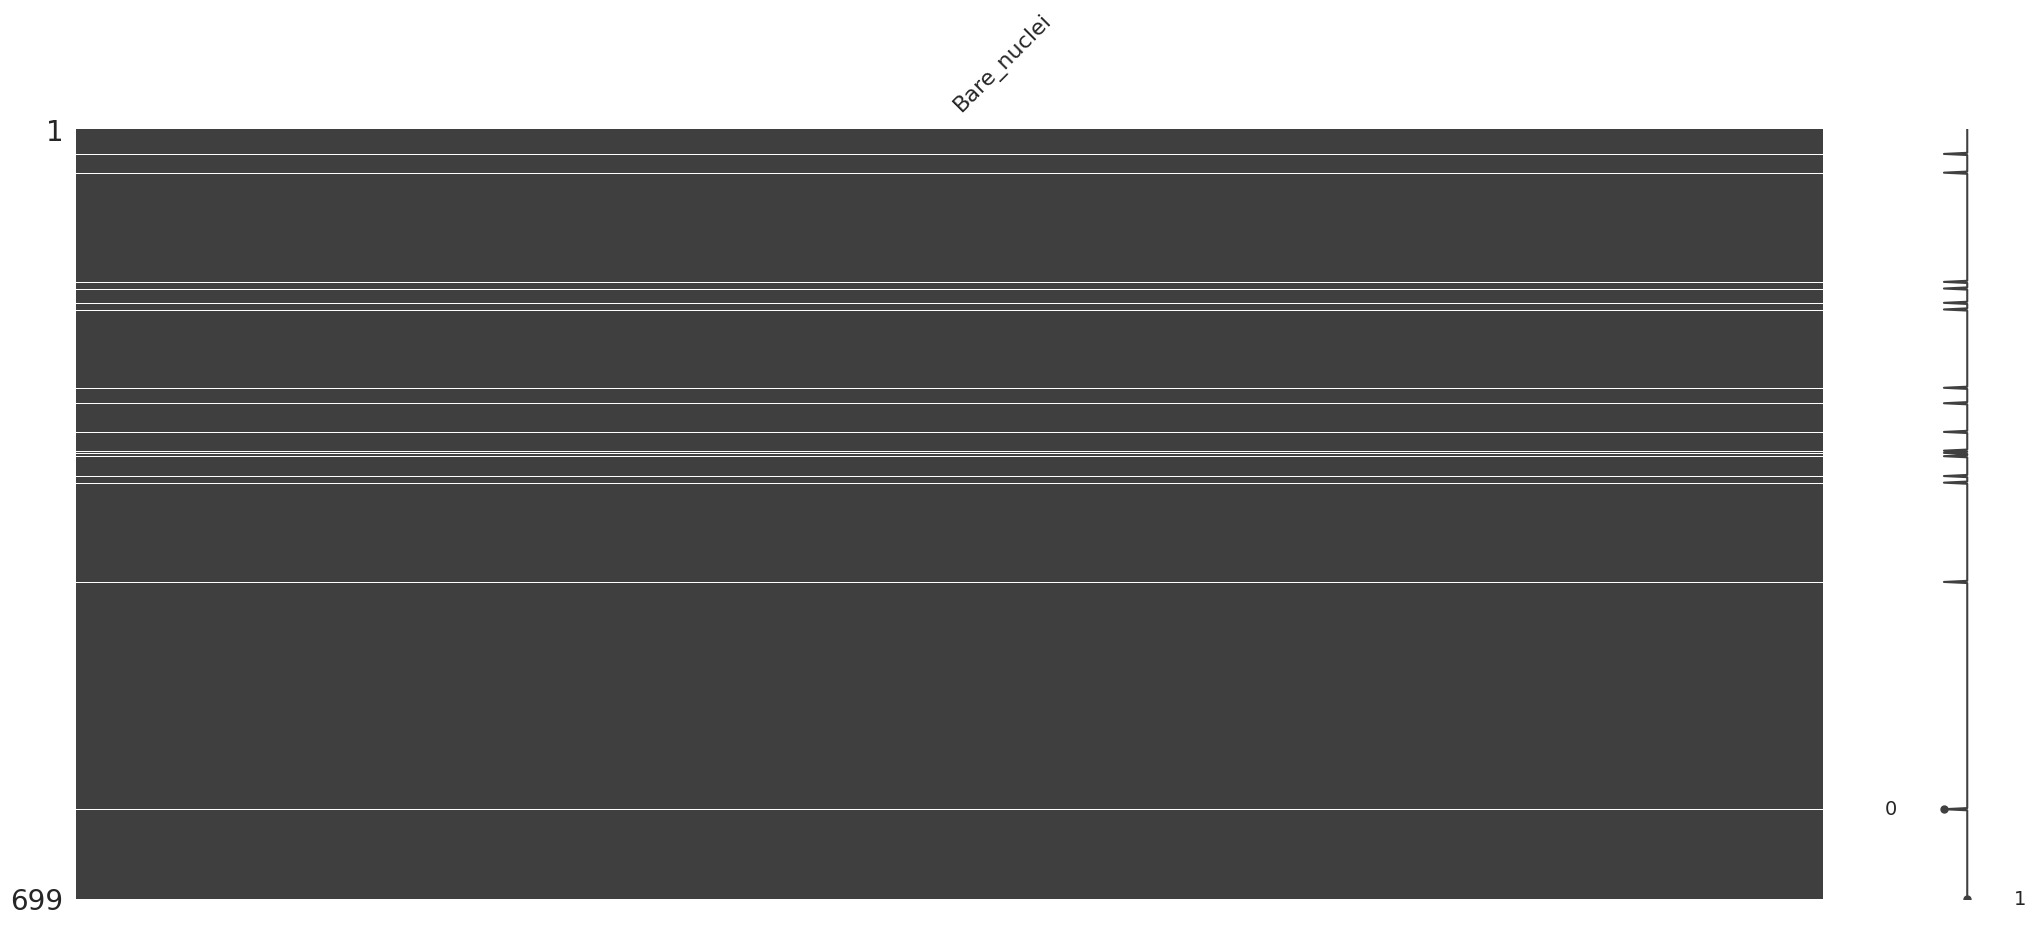

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
# hapus fitur jika fitur yang hilang lebih dari 50%
# dataset.drop(['fitur'], axis="columns", inplace=True)

In [ ]:
# Perbaiki nilai yang hilang
median_value=dataset['Bare_nuclei'].median()
dataset['Bare_nuclei']=dataset['Bare_nuclei'].fillna(median_value)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_of_cell_size      699 non-null    int64 
 2   Uniformity_of_cell_shape     699 non-null    int64 
 3   Marginal_adhesion            699 non-null    int64 
 4   Single_epithelial_cell_size  699 non-null    int64 
 5   Bare_nuclei                  699 non-null    object
 6   Bland_chromatin              699 non-null    int64 
 7   Normal_nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data

In [ ]:
dataset['Bare_nuclei'] = dataset['Bare_nuclei'].astype(str).astype(float)
# tambahkan jika perlu

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


### menghapus nilai yang bernilai konstan

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


In [ ]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


## BAB 7 – (J.62DMI00.010.1) menentukan label data

In [ ]:
y = dataset['Class']

In [ ]:
X = dataset.drop(columns=['Class'])

### Perlakukan data original

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1, random_state=42)

### Perlakuan data normal

In [ ]:
X_norm = StandardScaler().fit_transform(X)

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.1, random_state=42)

## BAB 8 – (J.62DMI00.013.1) membangun model

### menggunakan Decision Tree

In [ ]:
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,30,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [ ]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

#### Pemodelan data original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=13,
                                        random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 4
model__min_samples_leaf: 13
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data normal

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=13,
                                        random_state=42))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 4
model__min_samples_leaf: 13
model__min_samples_split: 2
model__random_state: 42


## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan

### evaluasi data original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.9634340222575517
Precision pada training set:  0.9634340222575517
Recall pada training set:  0.9634340222575517
Akurasi pada test set:  0.9571428571428572
Precision pada test set:  0.9571428571428572
Recall pada test set:  0.9571428571428572


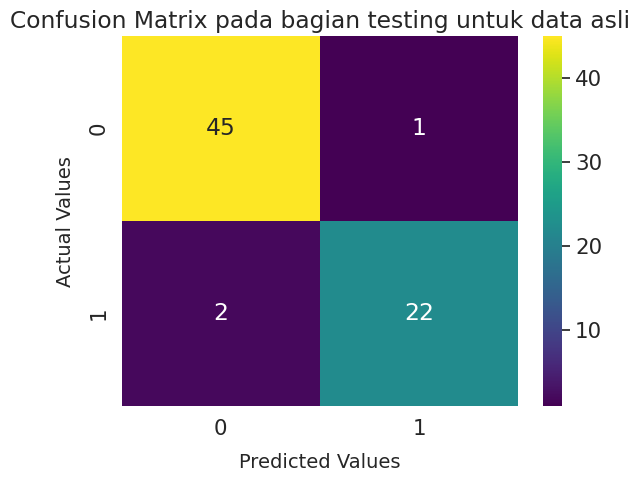

In [ ]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi data normal

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.9634340222575517
Precision pada training set:  0.9634340222575517
Recall pada training set:  0.9634340222575517
Akurasi pada test set:  0.9571428571428572
Precision pada test set:  0.9571428571428572
Recall pada test set:  0.9571428571428572


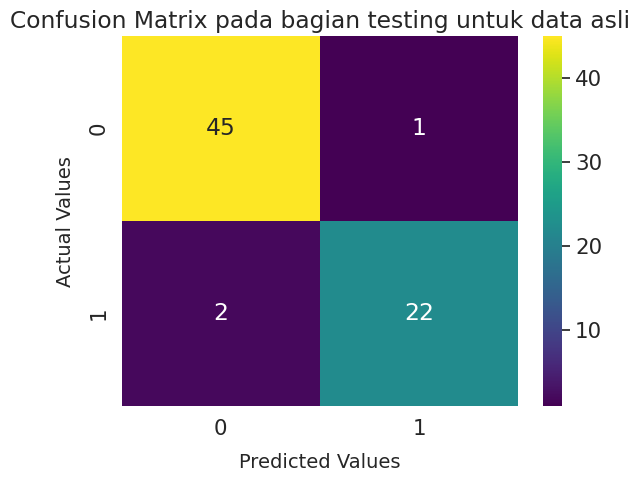

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### pelaporan evaluasi

In [ ]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test)
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Original,0.963434,0.957143
1,Machine Learning Data Normalisasi,0.963434,0.957143


In [ ]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test)
                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Data Original,0.957143,0.957143,0.957143
1,Machine Learning Data Normalisasi,0.957143,0.957143,0.957143


<ipython-input-73-ed03b9b906c7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
<ipython-input-73-ed03b9b906c7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])


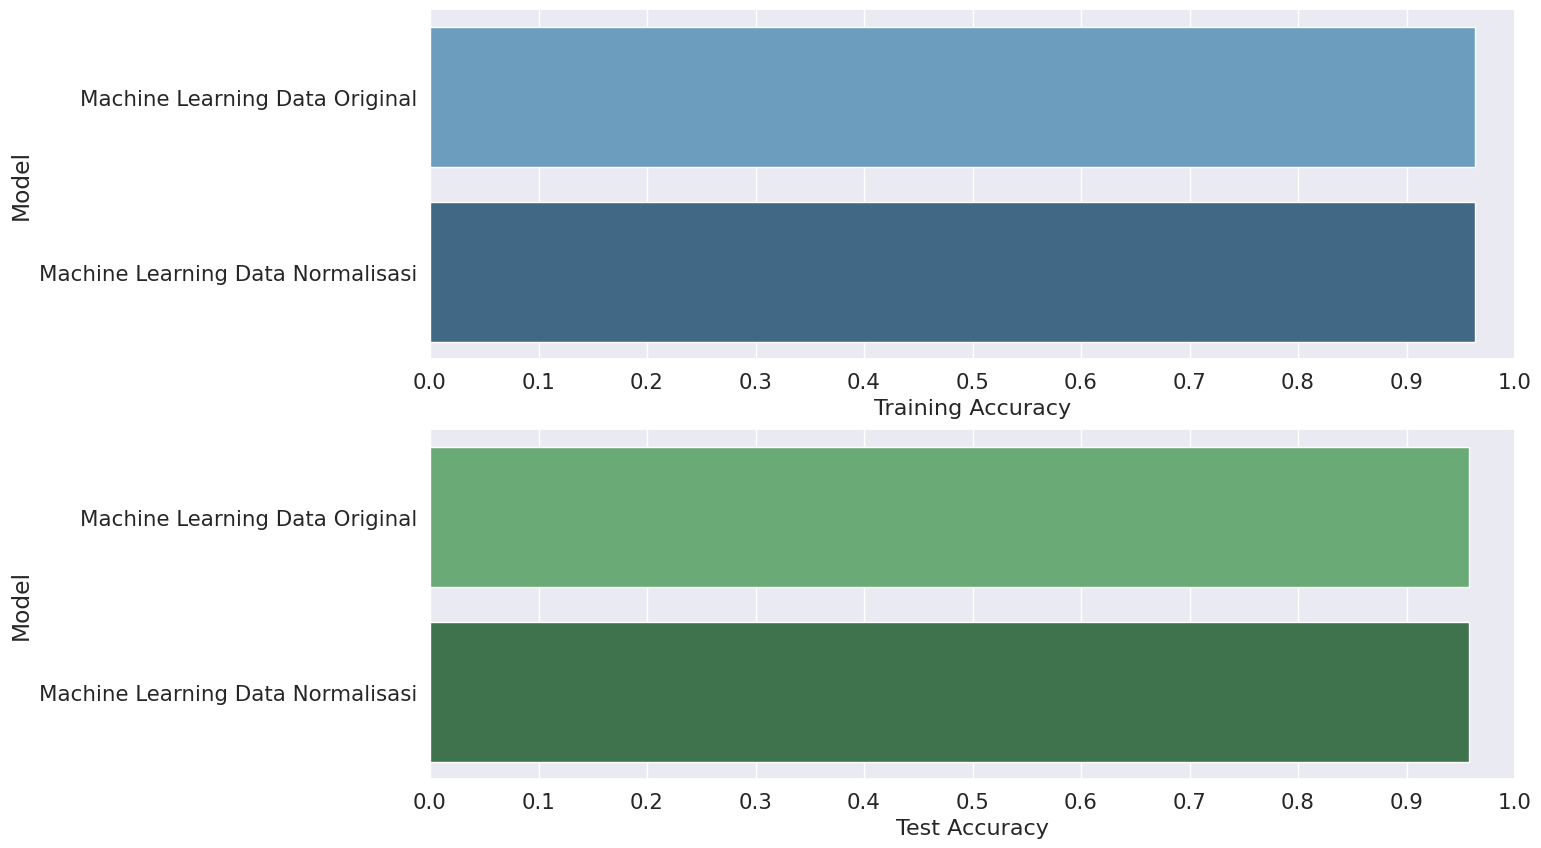

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data original)

In [ ]:
from sklearn import tree

In [ ]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    print(df_features_importance.sort_values(by='coef',ascending=False))
    return df_features_importance
Analize_Feature(ori_classifier_dt,X_test)

                          name      coef
1      Uniformity_of_cell_size  0.777777
5                  Bare_nuclei  0.141149
0              Clump_thickness  0.057418
2     Uniformity_of_cell_shape  0.014291
7              Normal_nucleoli  0.009366
3            Marginal_adhesion  0.000000
4  Single_epithelial_cell_size  0.000000
6              Bland_chromatin  0.000000
8                      Mitoses  0.000000


,name,coef
0,Clump_thickness,0.057418
1,Uniformity_of_cell_size,0.777777
2,Uniformity_of_cell_shape,0.014291
3,Marginal_adhesion,0.000000
4,Single_epithelial_cell_size,0.000000
5,Bare_nuclei,0.141149
6,Bland_chromatin,0.000000
7,Normal_nucleoli,0.009366
8,Mitoses,0.000000


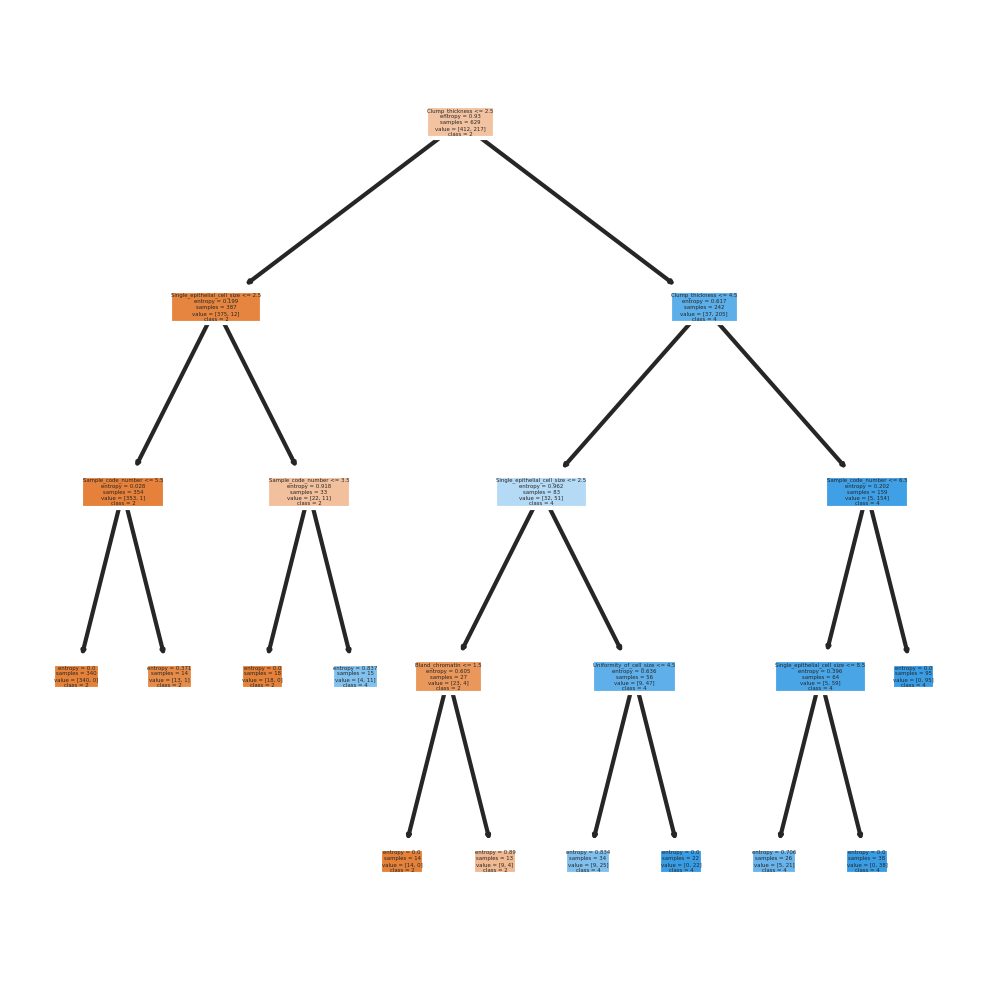

In [ ]:
fn=["Sample_code_number","Clump_thickness","Uniformity_of_cell_size","Uniformity_of_cell_shape","Marginal_adhesion","Single_epithelial_cell_size","Bare_nuclei","Bland_chromatin","Normal_nucleoli","Mitoses"]
cn=['2', '4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')